In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers import Dense, Activation, Dropout
from keras.layers import SimpleRNN
from keras.models import Sequential

In [109]:
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [110]:
import os

In [111]:
dataset=pd.read_csv(r"C:\Users\santh\Downloads\rainfall in india 1901-2015.csv",encoding="ISO-8859-1")

In [112]:
dataset.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [113]:
dataset.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [114]:
print(dataset.columns)


Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')


In [115]:
groups = dataset.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']]

In [116]:
data=groups.get_group(('BIHAR'))
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6


In [117]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [118]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [119]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [120]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [121]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,11,7.3


In [122]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,11,7.3,1901-11-01


In [123]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [124]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [125]:
series.shape

(1265, 1)

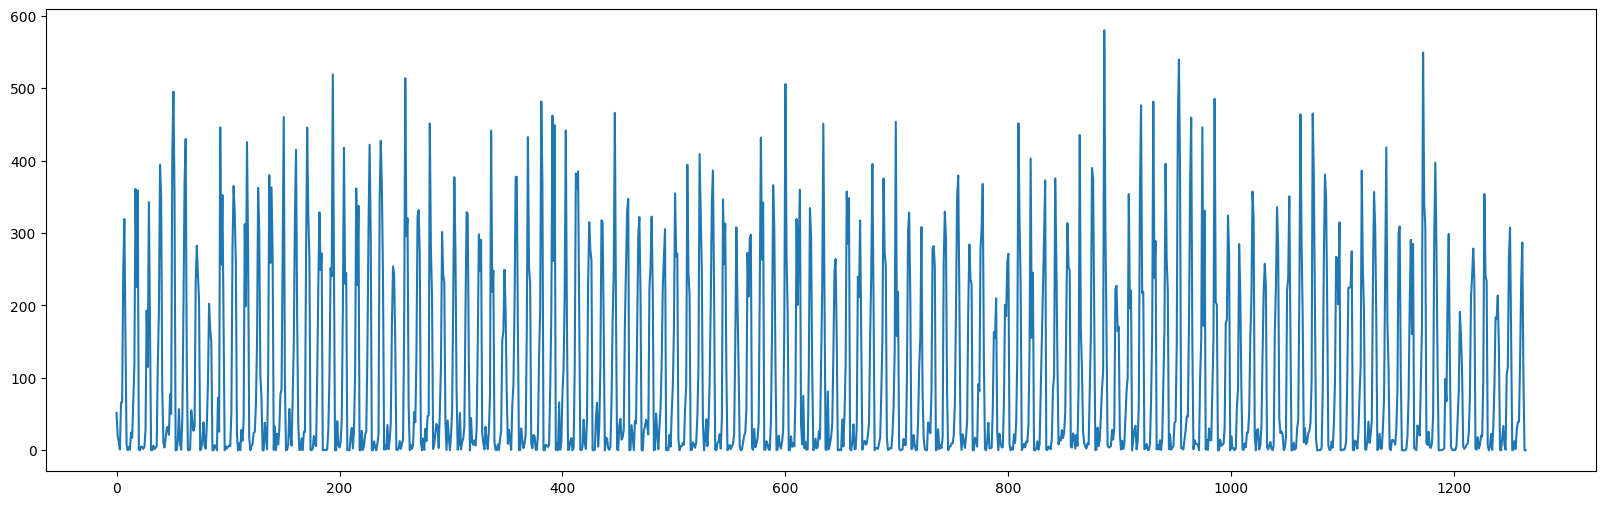

In [126]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [127]:
data_raw = series.values.astype("float32")
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)
dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [128]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1012, 253)


In [129]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [130]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1010, 1)
New training data shape:
(1010, 1, 1)


In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

def fit_model(train_X, train_Y, window_size=1):
    model = Sequential()
    
    model.add(SimpleRNN(2000, activation='tanh', input_shape=(1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")
    
    model.fit(train_X, train_Y, epochs=10, batch_size=64)
    
    return model

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)


c:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0845
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0466
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0471
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0428
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0403
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0395
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0408
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0358
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0356
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0368


In [136]:
import math
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training data score: 111.01 RMSE
Test data score: 98.82 RMSE


In [137]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict


In [138]:
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

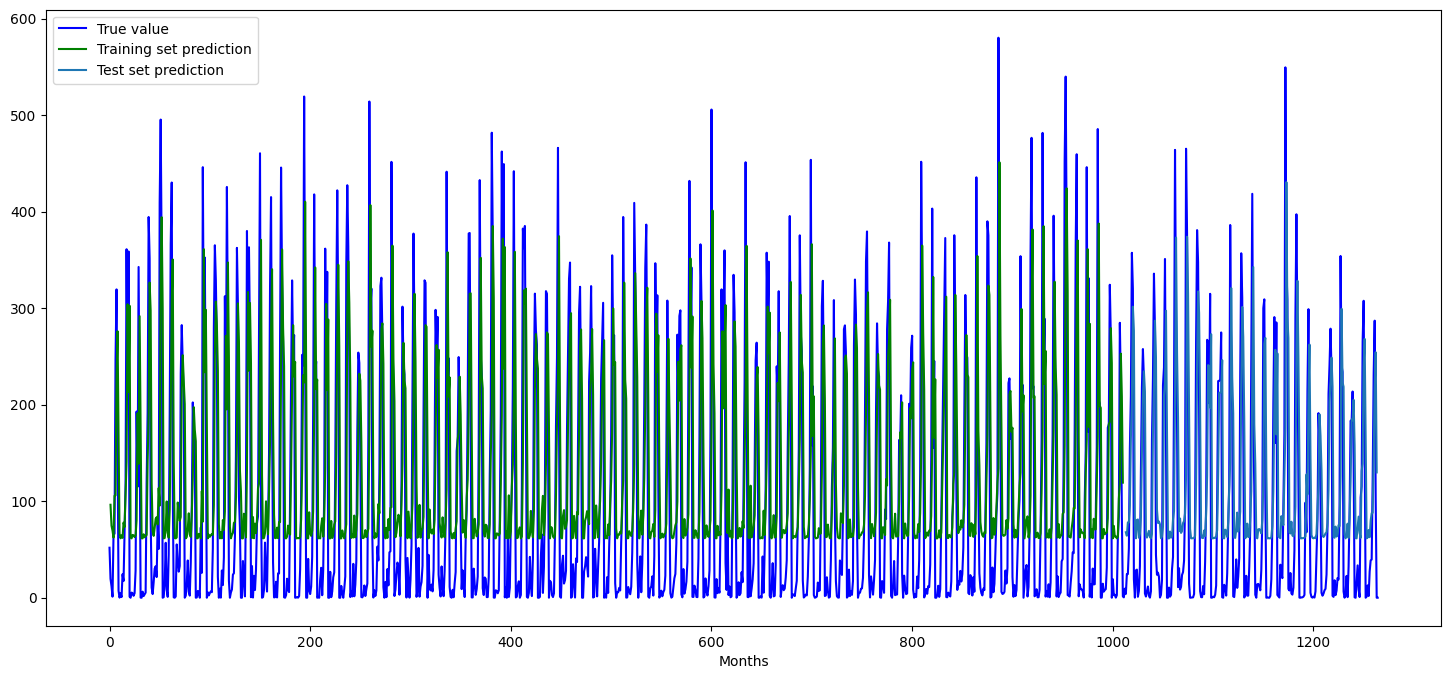

In [140]:
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='blue')
plt.plot(train_predict_plot, label = "Training set prediction",color='green')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


plt.legend()
plt.show()

In [141]:
test_predict


array([[ 67.81849 ],
       [ 64.19115 ],
       [ 77.96164 ],
       [ 77.96164 ],
       [ 95.82988 ],
       [165.48967 ],
       [201.96455 ],
       [301.50558 ],
       [276.45422 ],
       [ 74.46863 ],
       [ 61.571423],
       [ 80.51425 ],
       [ 81.05162 ],
       [ 62.17597 ],
       [ 66.20633 ],
       [ 83.46988 ],
       [149.43507 ],
       [207.74132 ],
       [234.54227 ],
       [213.65236 ],
       [ 64.45983 ],
       [ 62.310318],
       [ 66.072   ],
       [ 69.296295],
       [ 62.847694],
       [ 61.571423],
       [ 66.00481 ],
       [170.93074 ],
       [214.32408 ],
       [286.9988  ],
       [248.98343 ],
       [ 91.32922 ],
       [ 77.49144 ],
       [ 78.96925 ],
       [ 76.08079 ],
       [ 61.638596],
       [ 63.51943 ],
       [ 73.72973 ],
       [209.35345 ],
       [221.71284 ],
       [297.20734 ],
       [170.66203 ],
       [ 61.50424 ],
       [ 61.50424 ],
       [ 68.557396],
       [ 62.243153],
       [ 63.45226 ],
       [ 81.1

In [142]:
train_predict


array([[ 96.30011],
       [ 74.67015],
       [ 69.49781],
       ...,
       [252.8119 ],
       [208.74887],
       [119.20656]], dtype=float32)